A language sentence is a series of characters that convey a syntactic and
semantic meaning to the reader. Every author also has their own style of
writing. Our task in text generation is to create a new text that follows the
author’s style of writing and also has syntactic and semantic meaning to
the created text. For example, you may like to write a new novel based
on Shakespeare’s writing style or create a legal document based on the
previously judged legal cases, observing the legal style of writing such
documents. You may even like to generate a computer source code in
Python after understanding the syntax and the language structure from the
other Python programs

Problem : Text generation followed by a more realistic
example of generating text based on a text from a well-known novel

### Model Training

As we want to predict at the character level, we divide the entire text into
groups of characters called sequences

`“Investors so much about their startup hubs. As a lot of mind I
don’t know the more airborning case of the European of the
schedule, and from such sites"`

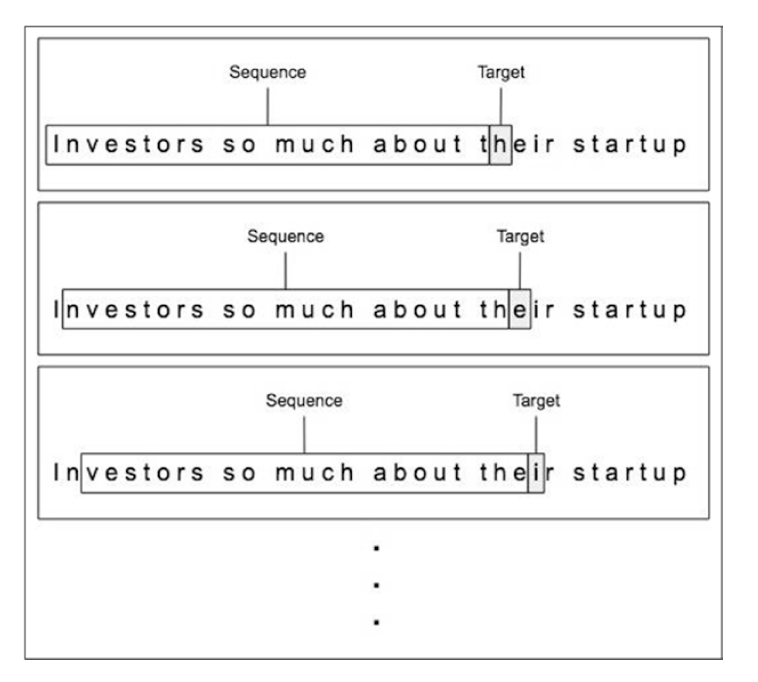

The first 25 characters would be grouped together in the order in
which they occur to create the first sequence. This sequence is followed
by the character h. Thus, we train the network saying that for this given
sequence of characters, the next character should be h. Then, we move the
window by one character to the right, and for the new sequence, we tell the
model that the next character for this sequence is e. This is now followed
by another shift in window where, as shown in the last sequence, the next
character would be i. Likewise, we keep training the model for the entire
corpus, telling it what would be the next character for any given sequence
of 25 characters in the text. Now, you will appreciate why the simple DNN (deep neural network) cannot be used for such applications, as these
applications require a long-term memory to memorize the sequences and
the characters following them

- Once the model is trained, hopefully it has learned the writing style,
syntax, and semantics of the text. Obviously, the more the corpus that you
feed, the better will be the understanding gained by the model. This is
equivalent to the fact that after reading several novels written by Agatha
Christie, a person starts understanding her style of writing    

After the
training is complete, how do we use the model to generate a new text in
the style of what it has learned ?

### Inference

We follow the steps similar to what we did during training. We start with a
seed consisting of a predefined sequence. Let us say we define a window
size of 25 characters like what we did during the training. The window
size used for inference need not be the same as the one used during the
training. Based on the given sequence of 25 characters, we ask the model
to predict the 26th character. We store the prediction somewhere as part of
the predicted text. We now shift the window to the right by one character,
this time taking the predicted character as the last 25th character in the
new sequence. For this newly created sequence, we ask the model to
predict the next character. The new prediction will now be added to the
next sequence and so on. Likewise, we can ask the model to predict any
number of characters following the given input seed. If the model has
learned the sequences well enough, it would produce the meaningful
text. I will show you the stepwise results during a long training in the large
corpus example in this chapter.

### Model Definition

### 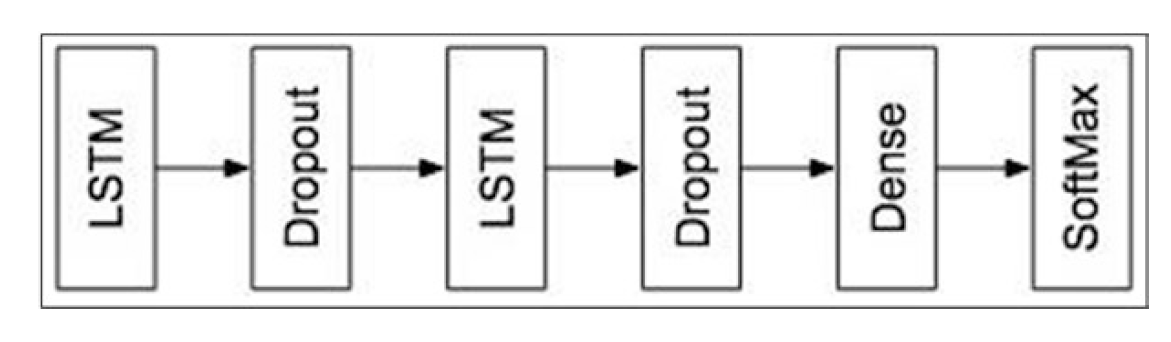

### Neural network for text generation

- Each LSTM layer would consist of a large number of nodes. The more
the number of nodes, the better would be the model’s ability to memorize
in the long term. This however would mean the large number of weights
to be trained. The model can learn the complex data well by making the
network deep, that is, adding more number of LSTM layers. For each LSTM
layer, the “return_sequences” parameter would be set to True because it
connects its output to the next LSTM layer. For the last LSTM layer, this
parameter would be set to False where the output is fed to a Dense layer
for character classification based on the probability score of each possible
character. We use softmax for this purpose

### Generating Baby Names

### Creating Project

In [1]:
import sys
import re
import requests
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Activation,Dropout,LSTM

### Downloading Text

In [42]:
r = requests.get("https://cs.stanford.edu/people/karpathy/namesGenUnique.txt")

On successful completion, you can extract the dataset by copying the
text from the response into a local variable

In [43]:
raw_txt = r.text

Check the length of the data read by calling the len method on the
raw_txt:

In [44]:
len(raw_txt)

52127

- You will get the output as 52127, indicating that there are totally 52,127
characters in the dataset
- 

In [45]:
raw_txt[:100].split()

['jka',
 'Dillie',
 'Ryine',
 'Cherita',
 'Dasher',
 'Chailine',
 'Frennide',
 'Gremaley',
 'Patj',
 'Handi',
 'Gully',
 'Wennie',
 'Ferentra',
 'Jixandli']

The program has printed the first 100 characters. The names obviously
are of variable lengths

### Processing Text

For inputting the data to our model for training, we must get rid of the \n
character. We replace it with a space by using the following command

In [46]:
raw_txt = raw_txt.replace('\n',' ')

We now extract all the unique characters from the raw_txt by creating a
set on it

In [47]:
set(raw_txt)

{' ',
 '-',
 '.',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

As you can see, the set contains characters such as space, dash (-),
dot (.), colon (:), and numerics (0 through 9)

Before training the model,
these characters should be removed from the set as they are not useful
in the new names that the model would be generating. We remove these
characters by using the regular expressions

In [48]:
raw_txt = re.sub('[-.0-9:]','',raw_txt)

In [49]:
raw_txt

'jka Dillie Ryine Cherita Dasher Chailine Frennide Gremaley Patj Handi Gully Wennie Ferentra Jixandlia Slimele Elispor Kathine Masdadina Chilcina Tiz Jolina Corbenton Haustina Delimeet Eppal Molenia Frecki Senny Helphon Saminda Ka Wynther Helsey Misa Lynetta Halonie Bartta Anathea Helricka Enezela Sherlees Randon Nokminia Belli RoWindon Jaena Meralin Orgen Whad Meyne Luchine Alogge Gren Kollette Leath Corth Mariedia Rhul Genylena Akepy Gabdie Jehn Rocelle Joeno Meruann Kainy Diliar Olell Welke Lileen Arti Valira Paynir Juvinge Krady Mogna Shabfoe Mandelina Rosatha Dacine Ull Vonell Elword Angrelly Kodilla Louge Temmie Gerthe Fildhine Olyna Dibfie Harmin Mellina Edongia Lorant Baires Dasher Quengy Kens Paac Jeencia Jaiep Deua Analine Mifalia Conette Dovanice Tyberr Irda Gerfand Auberro Thamosa Babrield Kait Stephepoa Abi Chrristen Stephanna Racky Dones Lys Vira Phela Deney Dorah Avet Ca iunia Jasqquosius Esty Solumote Hilling Gredie Dynae Berdiah Suynn Tile Blian Mancie Tovey JotaLine M

In [50]:
set(raw_txt)

{' ',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

Also, we do not need the presence of both uppercase and lowercase
characters in the generated baby names. So, we convert all the characters
to lowercase by calling the lower method

In [51]:
raw_txt1 = raw_txt.lower()

In [52]:
set(raw_txt1)

{' ',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

Try printing the set again, and you will notice that it contains only the
lowercase alphabets and the space character

You would be wondering why I did this entire exercise of data
processing if, finally, we wanted only a set of lowercase alphabets and
the space character. For generating the baby names, the destination
character set just contains the alphabets and the space to separate out
the names. However, in more advanced text generation applications
such as generating documents containing mathematical equations, legal
documents, science abstracts, and so on, your destination character set
would be much larger, containing all sorts of characters. However, taking
a large destination character set would also result in an exponential
increase in the training period. So, generally, we will strip a few unwanted
characters from the original text. Such text processing for removing the
undesired characters would result in faster training

In [53]:
len1 = len(set(raw_txt1))
len1

27

As the model works on numbers and not on the alphabets, you need
to map the alphabets to distinct numbers. Also, when the model outputs a
prediction, it will send you a set of numbers which must be converted back
to alphabets for you to make sense. Thus, we create two arrays for these
mappings

In [54]:
import numpy as np

In [55]:
chars = sorted(set(raw_txt1))
arr = np.arange(0,len1)

In [56]:
char_to_idx = {}
idx_to_char = {}
for i in range(len1):
    char_to_idx[chars[i]] = arr[i]
    idx_to_char[arr[i]] = chars[i]


In [24]:
char_to_idx

{' ': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [25]:
idx_to_char

{0: ' ',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

The char_to_ix array will provide a mapping from characters in the set
to unique integers, and ix_to_char will provide the reverse mappings from
integer to characters.

#### Now, you will create the input and output sequences

In [64]:
maxlen = 5
x_data = []
y_data = []

for i in range(0,len(raw_txt1) - maxlen,1):
    in_seq = raw_txt1[i:i+maxlen]
    out_seq = raw_txt1[i + maxlen]
    x_data.append([char_to_idx[char] for char in in_seq])
    y_data.append([char_to_idx[out_seq]])
nb_chars = len(x_data)
print('Text corpus: {}'.format(nb_chars))
print('Sequences # ', int(len(x_data) / maxlen))

Text corpus: 52038
Sequences #  10407


In [65]:
x_data

[[10, 11, 1, 0, 4],
 [11, 1, 0, 4, 9],
 [1, 0, 4, 9, 12],
 [0, 4, 9, 12, 12],
 [4, 9, 12, 12, 9],
 [9, 12, 12, 9, 5],
 [12, 12, 9, 5, 0],
 [12, 9, 5, 0, 18],
 [9, 5, 0, 18, 25],
 [5, 0, 18, 25, 9],
 [0, 18, 25, 9, 14],
 [18, 25, 9, 14, 5],
 [25, 9, 14, 5, 0],
 [9, 14, 5, 0, 3],
 [14, 5, 0, 3, 8],
 [5, 0, 3, 8, 5],
 [0, 3, 8, 5, 18],
 [3, 8, 5, 18, 9],
 [8, 5, 18, 9, 20],
 [5, 18, 9, 20, 1],
 [18, 9, 20, 1, 0],
 [9, 20, 1, 0, 4],
 [20, 1, 0, 4, 1],
 [1, 0, 4, 1, 19],
 [0, 4, 1, 19, 8],
 [4, 1, 19, 8, 5],
 [1, 19, 8, 5, 18],
 [19, 8, 5, 18, 0],
 [8, 5, 18, 0, 3],
 [5, 18, 0, 3, 8],
 [18, 0, 3, 8, 1],
 [0, 3, 8, 1, 9],
 [3, 8, 1, 9, 12],
 [8, 1, 9, 12, 9],
 [1, 9, 12, 9, 14],
 [9, 12, 9, 14, 5],
 [12, 9, 14, 5, 0],
 [9, 14, 5, 0, 6],
 [14, 5, 0, 6, 18],
 [5, 0, 6, 18, 5],
 [0, 6, 18, 5, 14],
 [6, 18, 5, 14, 14],
 [18, 5, 14, 14, 9],
 [5, 14, 14, 9, 4],
 [14, 14, 9, 4, 5],
 [14, 9, 4, 5, 0],
 [9, 4, 5, 0, 7],
 [4, 5, 0, 7, 18],
 [5, 0, 7, 18, 5],
 [0, 7, 18, 5, 13],
 [7, 18, 5, 13, 1],
 [1

- The dataset consists of 52,038 characters, which is divided into 10,407
sequences, each of length 5

#### Next, we transform the data into numpy arrays for inputting to our model and also normalize the training data to a scale of 0 to 1.

In [66]:
x = np.reshape(x_data,(nb_chars,maxlen,1))

x = x/float(len(chars))

In [67]:
x.shape

(52038, 5, 1)

We convert the target sequence into categorical columns.

In [69]:
y = tf.keras.utils.to_categorical(y_data)

In [74]:
y[:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [71]:
y_data

[[9],
 [12],
 [12],
 [9],
 [5],
 [0],
 [18],
 [25],
 [9],
 [14],
 [5],
 [0],
 [3],
 [8],
 [5],
 [18],
 [9],
 [20],
 [1],
 [0],
 [4],
 [1],
 [19],
 [8],
 [5],
 [18],
 [0],
 [3],
 [8],
 [1],
 [9],
 [12],
 [9],
 [14],
 [5],
 [0],
 [6],
 [18],
 [5],
 [14],
 [14],
 [9],
 [4],
 [5],
 [0],
 [7],
 [18],
 [5],
 [13],
 [1],
 [12],
 [5],
 [25],
 [0],
 [16],
 [1],
 [20],
 [10],
 [0],
 [8],
 [1],
 [14],
 [4],
 [9],
 [0],
 [7],
 [21],
 [12],
 [12],
 [25],
 [0],
 [23],
 [5],
 [14],
 [14],
 [9],
 [5],
 [0],
 [6],
 [5],
 [18],
 [5],
 [14],
 [20],
 [18],
 [1],
 [0],
 [10],
 [9],
 [24],
 [1],
 [14],
 [4],
 [12],
 [9],
 [1],
 [0],
 [19],
 [12],
 [9],
 [13],
 [5],
 [12],
 [5],
 [0],
 [5],
 [12],
 [9],
 [19],
 [16],
 [15],
 [18],
 [0],
 [11],
 [1],
 [20],
 [8],
 [9],
 [14],
 [5],
 [0],
 [13],
 [1],
 [19],
 [4],
 [1],
 [4],
 [9],
 [14],
 [1],
 [0],
 [3],
 [8],
 [9],
 [12],
 [3],
 [9],
 [14],
 [1],
 [0],
 [20],
 [9],
 [26],
 [0],
 [10],
 [15],
 [12],
 [9],
 [14],
 [1],
 [0],
 [3],
 [15],
 [18],
 [2],
 [5],
 [

In [75]:
idx_to_char

{0: ' ',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [77]:
# raw_txt1

In this array, one of the values is 1, while the rest are 0. The value 1
corresponds to the character in the char_to_ix array at that particular index
in the array.

In [78]:
x.shape

(52038, 5, 1)

In [79]:
x[0]

array([[0.37037037],
       [0.40740741],
       [0.03703704],
       [0.        ],
       [0.14814815]])

This indicates that the input has 52,038 sequences, each of length 5.

In [80]:
y.shape

(52038, 27)

There are 27 categories in the output

### Defining Model

We define our model as follows:

In [83]:
len(y[0])

27

In [84]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(256,input_shape=(maxlen,1),return_sequences=True),
    tf.keras.layers.LSTM(256,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(y[1]),activation='softmax')
    
])

In [85]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 256)            264192    
                                                                 
 lstm_1 (LSTM)               (None, 5, 256)            525312    
                                                                 
 dropout (Dropout)           (None, 5, 256)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                82176     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 27)                1755      
                                                                 
Total params: 873,435
Trainable params: 873,435
Non-trai

## Compiling

In [86]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam')

Note that for these kinds of language model problems, there is no test
dataset. We model the entire dataset to predict the probability of each
categorical character in a sequence. The model accuracy in predicting the
next character perfectly is not important to us. Rather, we are interested
in minimizing the chosen loss function. Thus, we are trying to achieve a
balance between generalization and overfitting that is short of memorization.

### Creating Checkpoints

Training an LSTM network typically takes a long time. Due to the nature
of the network itself, the loss after each epoch may increase or decrease.
The lowest loss will finally give us the best results in our predictions. Thus,
we need to capture the model weights for the epoch which has given us
the lowest loss. This is done by using the ModelCheckPoint method and
setting the callback after each epoch.

In [87]:
filepath = "model_weights_babynames.tf"
checkpoint = ModelCheckpoint(filepath,monitor = 'loss', verbose = 1,save_best_only = True, mode = 'min')
model_callbacks = [checkpoint]

In [88]:
model.fit(x,y, epochs = 300, batch_size = 32 ,callbacks = model_callbacks)

Epoch 1/300
1627/1627 [==============================] - ETA: 0s - loss: 2.7781
Epoch 1: loss improved from inf to 2.77805, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 37s 18ms/step - loss: 2.7781
Epoch 2/300
1624/1627 [============================>.] - ETA: 0s - loss: 2.5781
Epoch 2: loss improved from 2.77805 to 2.57820, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 2.5782
Epoch 3/300
1625/1627 [============================>.] - ETA: 0s - loss: 2.5022
Epoch 3: loss improved from 2.57820 to 2.50175, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 2.5018
Epoch 4/300
1624/1627 [============================>.] - ETA: 0s - loss: 2.4616
Epoch 4: loss improved from 2.50175 to 2.46184, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 2.4618
Epoch 5/300
1625/1627 [============================>.] - ETA: 0s - loss: 2.4366
Epoch 5: loss improved from 2.46184 to 2.43656, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 2.4366
Epoch 6/300
1624/1627 [============================>.] - ETA: 0s - loss: 2.4112
Epoch 6: loss improved from 2.43656 to 2.41104, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 17ms/step - loss: 2.4110
Epoch 7/300
1627/1627 [==============================] - ETA: 0s - loss: 2.3875
Epoch 7: loss improved from 2.41104 to 2.38748, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 2.3875
Epoch 8/300
1627/1627 [==============================] - ETA: 0s - loss: 2.3715
Epoch 8: loss improved from 2.38748 to 2.37148, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 2.3715
Epoch 9/300
1627/1627 [==============================] - ETA: 0s - loss: 2.3564
Epoch 9: loss improved from 2.37148 to 2.35636, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 2.3564
Epoch 10/300
1627/1627 [==============================] - ETA: 0s - loss: 2.3402
Epoch 10: loss improved from 2.35636 to 2.34018, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 19ms/step - loss: 2.3402
Epoch 11/300
1623/1627 [============================>.] - ETA: 0s - loss: 2.3249
Epoch 11: loss improved from 2.34018 to 2.32520, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 18ms/step - loss: 2.3252
Epoch 12/300
1626/1627 [============================>.] - ETA: 0s - loss: 2.3146
Epoch 12: loss improved from 2.32520 to 2.31449, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 2.3145
Epoch 13/300
1623/1627 [============================>.] - ETA: 0s - loss: 2.3048
Epoch 13: loss improved from 2.31449 to 2.30474, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 2.3047
Epoch 14/300
1624/1627 [============================>.] - ETA: 0s - loss: 2.2882
Epoch 14: loss improved from 2.30474 to 2.28812, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 2.2881
Epoch 15/300
1625/1627 [============================>.] - ETA: 0s - loss: 2.2780
Epoch 15: loss improved from 2.28812 to 2.27794, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 2.2779
Epoch 16/300
1626/1627 [============================>.] - ETA: 0s - loss: 2.2735
Epoch 16: loss improved from 2.27794 to 2.27350, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 16ms/step - loss: 2.2735
Epoch 17/300
1621/1627 [============================>.] - ETA: 0s - loss: 2.2581
Epoch 17: loss improved from 2.27350 to 2.25846, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 2.2585
Epoch 18/300
1622/1627 [============================>.] - ETA: 0s - loss: 2.2511
Epoch 18: loss improved from 2.25846 to 2.25081, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 2.2508
Epoch 19/300
1624/1627 [============================>.] - ETA: 0s - loss: 2.2382
Epoch 19: loss improved from 2.25081 to 2.23823, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 2.2382
Epoch 20/300
1627/1627 [==============================] - ETA: 0s - loss: 2.2287
Epoch 20: loss improved from 2.23823 to 2.22866, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 2.2287
Epoch 21/300
1622/1627 [============================>.] - ETA: 0s - loss: 2.2169
Epoch 21: loss improved from 2.22866 to 2.21693, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 2.2169
Epoch 22/300
1626/1627 [============================>.] - ETA: 0s - loss: 2.2061
Epoch 22: loss improved from 2.21693 to 2.20614, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 2.2061
Epoch 23/300
1627/1627 [==============================] - ETA: 0s - loss: 2.2026
Epoch 23: loss improved from 2.20614 to 2.20256, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 2.2026
Epoch 24/300
1623/1627 [============================>.] - ETA: 0s - loss: 2.1886
Epoch 24: loss improved from 2.20256 to 2.18876, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 2.1888
Epoch 25/300
1624/1627 [============================>.] - ETA: 0s - loss: 2.1823
Epoch 25: loss improved from 2.18876 to 2.18275, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 2.1827
Epoch 26/300
1624/1627 [============================>.] - ETA: 0s - loss: 2.1771
Epoch 26: loss improved from 2.18275 to 2.17684, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 2.1768
Epoch 27/300
1627/1627 [==============================] - ETA: 0s - loss: 2.1618
Epoch 27: loss improved from 2.17684 to 2.16178, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 17ms/step - loss: 2.1618
Epoch 28/300
1623/1627 [============================>.] - ETA: 0s - loss: 2.1510
Epoch 28: loss improved from 2.16178 to 2.15136, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 26s 16ms/step - loss: 2.1514
Epoch 29/300
1627/1627 [==============================] - ETA: 0s - loss: 2.1452
Epoch 29: loss improved from 2.15136 to 2.14522, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 19ms/step - loss: 2.1452
Epoch 30/300
1622/1627 [============================>.] - ETA: 0s - loss: 2.1369
Epoch 30: loss improved from 2.14522 to 2.13695, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 32s 20ms/step - loss: 2.1370
Epoch 31/300
1623/1627 [============================>.] - ETA: 0s - loss: 2.1273
Epoch 31: loss improved from 2.13695 to 2.12734, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 2.1273
Epoch 32/300
1625/1627 [============================>.] - ETA: 0s - loss: 2.1156
Epoch 32: loss improved from 2.12734 to 2.11549, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 2.1155
Epoch 33/300
1626/1627 [============================>.] - ETA: 0s - loss: 2.1093
Epoch 33: loss improved from 2.11549 to 2.10924, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 2.1092
Epoch 34/300
1623/1627 [============================>.] - ETA: 0s - loss: 2.0934
Epoch 34: loss improved from 2.10924 to 2.09360, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 18ms/step - loss: 2.0936
Epoch 35/300
1623/1627 [============================>.] - ETA: 0s - loss: 2.0867
Epoch 35: loss improved from 2.09360 to 2.08702, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 17ms/step - loss: 2.0870
Epoch 36/300
1624/1627 [============================>.] - ETA: 0s - loss: 2.0737
Epoch 36: loss improved from 2.08702 to 2.07355, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 2.0736
Epoch 37/300
1622/1627 [============================>.] - ETA: 0s - loss: 2.0683
Epoch 37: loss improved from 2.07355 to 2.06814, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 2.0681
Epoch 38/300
1624/1627 [============================>.] - ETA: 0s - loss: 2.0588
Epoch 38: loss improved from 2.06814 to 2.05915, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 2.0591
Epoch 39/300
1623/1627 [============================>.] - ETA: 0s - loss: 2.0502
Epoch 39: loss improved from 2.05915 to 2.05020, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 2.0502
Epoch 40/300
1626/1627 [============================>.] - ETA: 0s - loss: 2.0444
Epoch 40: loss improved from 2.05020 to 2.04440, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 17ms/step - loss: 2.0444
Epoch 41/300
1627/1627 [==============================] - ETA: 0s - loss: 2.0319
Epoch 41: loss improved from 2.04440 to 2.03190, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 2.0319
Epoch 42/300
1622/1627 [============================>.] - ETA: 0s - loss: 2.0239
Epoch 42: loss improved from 2.03190 to 2.02408, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 2.0241
Epoch 43/300
1623/1627 [============================>.] - ETA: 0s - loss: 2.0151
Epoch 43: loss improved from 2.02408 to 2.01553, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 2.0155
Epoch 44/300
1625/1627 [============================>.] - ETA: 0s - loss: 2.0080
Epoch 44: loss improved from 2.01553 to 2.00821, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 2.0082
Epoch 45/300
1627/1627 [==============================] - ETA: 0s - loss: 2.0035
Epoch 45: loss improved from 2.00821 to 2.00348, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 26s 16ms/step - loss: 2.0035
Epoch 46/300
1627/1627 [==============================] - ETA: 0s - loss: 1.9936
Epoch 46: loss improved from 2.00348 to 1.99362, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.9936
Epoch 47/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.9822
Epoch 47: loss improved from 1.99362 to 1.98229, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.9823
Epoch 48/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.9715
Epoch 48: loss improved from 1.98229 to 1.97144, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.9714
Epoch 49/300
1627/1627 [==============================] - ETA: 0s - loss: 1.9643
Epoch 49: loss improved from 1.97144 to 1.96429, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 17ms/step - loss: 1.9643
Epoch 50/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.9592
Epoch 50: loss improved from 1.96429 to 1.95921, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 16ms/step - loss: 1.9592
Epoch 51/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.9487
Epoch 51: loss improved from 1.95921 to 1.94849, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 18ms/step - loss: 1.9485
Epoch 52/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.9408
Epoch 52: loss improved from 1.94849 to 1.94026, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 18ms/step - loss: 1.9403
Epoch 53/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.9355
Epoch 53: loss improved from 1.94026 to 1.93558, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 33s 20ms/step - loss: 1.9356
Epoch 54/300
1627/1627 [==============================] - ETA: 0s - loss: 1.9265
Epoch 54: loss improved from 1.93558 to 1.92652, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 32s 20ms/step - loss: 1.9265
Epoch 55/300
1627/1627 [==============================] - ETA: 0s - loss: 1.9229
Epoch 55: loss improved from 1.92652 to 1.92294, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.9229
Epoch 56/300
1627/1627 [==============================] - ETA: 0s - loss: 1.9118
Epoch 56: loss improved from 1.92294 to 1.91180, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.9118
Epoch 57/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.9043
Epoch 57: loss improved from 1.91180 to 1.90474, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 16ms/step - loss: 1.9047
Epoch 58/300
1627/1627 [==============================] - ETA: 0s - loss: 1.8958
Epoch 58: loss improved from 1.90474 to 1.89583, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.8958
Epoch 59/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.8907
Epoch 59: loss improved from 1.89583 to 1.89081, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 17ms/step - loss: 1.8908
Epoch 60/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.8841
Epoch 60: loss improved from 1.89081 to 1.88404, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 16ms/step - loss: 1.8840
Epoch 61/300
1627/1627 [==============================] - ETA: 0s - loss: 1.8765
Epoch 61: loss improved from 1.88404 to 1.87653, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 17ms/step - loss: 1.8765
Epoch 62/300
1627/1627 [==============================] - ETA: 0s - loss: 1.8686
Epoch 62: loss improved from 1.87653 to 1.86863, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.8686
Epoch 63/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.8651
Epoch 63: loss improved from 1.86863 to 1.86506, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 31s 19ms/step - loss: 1.8651
Epoch 64/300
1627/1627 [==============================] - ETA: 0s - loss: 1.8543
Epoch 64: loss improved from 1.86506 to 1.85426, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 34s 21ms/step - loss: 1.8543
Epoch 65/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.8539
Epoch 65: loss improved from 1.85426 to 1.85371, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 18ms/step - loss: 1.8537
Epoch 66/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.8498
Epoch 66: loss improved from 1.85371 to 1.84967, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.8497
Epoch 67/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.8393
Epoch 67: loss improved from 1.84967 to 1.83957, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.8396
Epoch 68/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.8307
Epoch 68: loss improved from 1.83957 to 1.83056, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.8306
Epoch 69/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.8259
Epoch 69: loss improved from 1.83056 to 1.82618, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.8262
Epoch 70/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.8178
Epoch 70: loss improved from 1.82618 to 1.81799, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 16ms/step - loss: 1.8180
Epoch 71/300
1622/1627 [============================>.] - ETA: 0s - loss: 1.8148
Epoch 71: loss improved from 1.81799 to 1.81456, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 17ms/step - loss: 1.8146
Epoch 72/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.8091
Epoch 72: loss improved from 1.81456 to 1.80903, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.8090
Epoch 73/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.8038
Epoch 73: loss improved from 1.80903 to 1.80377, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.8038
Epoch 74/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.7942
Epoch 74: loss improved from 1.80377 to 1.79424, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.7942
Epoch 75/300
1621/1627 [============================>.] - ETA: 0s - loss: 1.7921
Epoch 75: loss improved from 1.79424 to 1.79259, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 17ms/step - loss: 1.7926
Epoch 76/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.7843
Epoch 76: loss improved from 1.79259 to 1.78488, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.7849
Epoch 77/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.7823
Epoch 77: loss improved from 1.78488 to 1.78258, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 16ms/step - loss: 1.7826
Epoch 78/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.7780
Epoch 78: loss improved from 1.78258 to 1.77806, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 31s 19ms/step - loss: 1.7781
Epoch 79/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.7722
Epoch 79: loss improved from 1.77806 to 1.77224, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 18ms/step - loss: 1.7722
Epoch 80/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.7608
Epoch 80: loss improved from 1.77224 to 1.76043, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.7604
Epoch 81/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.7619
Epoch 81: loss did not improve from 1.76043
1627/1627 [==============================] - 19s 12ms/step - loss: 1.7618
Epoch 82/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.7528
Epoch 82: loss improved from 1.76043 to 1.75298, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.7530
Epoch 83/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.7489
Epoch 83: loss improved from 1.75298 to 1.74910, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 18ms/step - loss: 1.7491
Epoch 84/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.7425
Epoch 84: loss improved from 1.74910 to 1.74242, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 18ms/step - loss: 1.7424
Epoch 85/300
1622/1627 [============================>.] - ETA: 0s - loss: 1.7385
Epoch 85: loss improved from 1.74242 to 1.73838, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 31s 19ms/step - loss: 1.7384
Epoch 86/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.7350
Epoch 86: loss improved from 1.73838 to 1.73495, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 18ms/step - loss: 1.7349
Epoch 87/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.7245
Epoch 87: loss improved from 1.73495 to 1.72432, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.7243
Epoch 88/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.7304
Epoch 88: loss did not improve from 1.72432
1627/1627 [==============================] - 18s 11ms/step - loss: 1.7305
Epoch 89/300
1621/1627 [============================>.] - ETA: 0s - loss: 1.7178
Epoch 89: loss improved from 1.72432 to 1.71751, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 16ms/step - loss: 1.7175
Epoch 90/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.7214
Epoch 90: loss did not improve from 1.71751
1627/1627 [==============================] - 19s 11ms/step - loss: 1.7211
Epoch 91/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.7132
Epoch 91: loss improved from 1.71751 to 1.71365, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 17ms/step - loss: 1.7137
Epoch 92/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.7078
Epoch 92: loss improved from 1.71365 to 1.70812, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 17ms/step - loss: 1.7081
Epoch 93/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.7024
Epoch 93: loss improved from 1.70812 to 1.70253, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.7025
Epoch 94/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.6991
Epoch 94: loss improved from 1.70253 to 1.69922, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.6992
Epoch 95/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.6888
Epoch 95: loss improved from 1.69922 to 1.68868, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 17ms/step - loss: 1.6887
Epoch 96/300
1622/1627 [============================>.] - ETA: 0s - loss: 1.6845
Epoch 96: loss improved from 1.68868 to 1.68475, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.6848
Epoch 97/300
1627/1627 [==============================] - ETA: 0s - loss: 1.6861
Epoch 97: loss did not improve from 1.68475
1627/1627 [==============================] - 20s 12ms/step - loss: 1.6861
Epoch 98/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.6789
Epoch 98: loss improved from 1.68475 to 1.67891, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.6789
Epoch 99/300
1627/1627 [==============================] - ETA: 0s - loss: 1.6757
Epoch 99: loss improved from 1.67891 to 1.67570, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 31s 19ms/step - loss: 1.6757
Epoch 100/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.6703
Epoch 100: loss improved from 1.67570 to 1.67034, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.6703
Epoch 101/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.6781
Epoch 101: loss did not improve from 1.67034
1627/1627 [==============================] - 18s 11ms/step - loss: 1.6782
Epoch 102/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.6659
Epoch 102: loss improved from 1.67034 to 1.66592, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 31s 19ms/step - loss: 1.6659
Epoch 103/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.6639
Epoch 103: loss improved from 1.66592 to 1.66382, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 31s 19ms/step - loss: 1.6638
Epoch 104/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.6582
Epoch 104: loss improved from 1.66382 to 1.65823, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 32s 20ms/step - loss: 1.6582
Epoch 105/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.6520
Epoch 105: loss improved from 1.65823 to 1.65197, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 33s 20ms/step - loss: 1.6520
Epoch 106/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.6548
Epoch 106: loss did not improve from 1.65197
1627/1627 [==============================] - 20s 12ms/step - loss: 1.6549
Epoch 107/300
1622/1627 [============================>.] - ETA: 0s - loss: 1.6462
Epoch 107: loss improved from 1.65197 to 1.64653, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 32s 20ms/step - loss: 1.6465
Epoch 108/300
1622/1627 [============================>.] - ETA: 0s - loss: 1.6425
Epoch 108: loss improved from 1.64653 to 1.64242, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 34s 21ms/step - loss: 1.6424
Epoch 109/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.6385
Epoch 109: loss improved from 1.64242 to 1.63829, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 33s 20ms/step - loss: 1.6383
Epoch 110/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.6325
Epoch 110: loss improved from 1.63829 to 1.63262, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 32s 20ms/step - loss: 1.6326
Epoch 111/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.6309
Epoch 111: loss improved from 1.63262 to 1.63112, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 31s 19ms/step - loss: 1.6311
Epoch 112/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.6311
Epoch 112: loss improved from 1.63112 to 1.63111, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.6311
Epoch 113/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.6232
Epoch 113: loss improved from 1.63111 to 1.62327, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.6233
Epoch 114/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.6243
Epoch 114: loss did not improve from 1.62327
1627/1627 [==============================] - 20s 12ms/step - loss: 1.6242
Epoch 115/300
1622/1627 [============================>.] - ETA: 0s - loss: 1.6191
Epoch 115: loss improved from 1.62327 to 1.61889, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.6189
Epoch 116/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.6148
Epoch 116: loss improved from 1.61889 to 1.61484, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.6148
Epoch 117/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.6063
Epoch 117: loss improved from 1.61484 to 1.60619, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 17ms/step - loss: 1.6062
Epoch 118/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.6049
Epoch 118: loss improved from 1.60619 to 1.60495, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.6050
Epoch 119/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.6057
Epoch 119: loss did not improve from 1.60495
1627/1627 [==============================] - 19s 12ms/step - loss: 1.6058
Epoch 120/300
1622/1627 [============================>.] - ETA: 0s - loss: 1.6005
Epoch 120: loss improved from 1.60495 to 1.60041, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 17ms/step - loss: 1.6004
Epoch 121/300
1627/1627 [==============================] - ETA: 0s - loss: 1.5993
Epoch 121: loss improved from 1.60041 to 1.59933, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.5993
Epoch 122/300
1627/1627 [==============================] - ETA: 0s - loss: 1.5990
Epoch 122: loss improved from 1.59933 to 1.59904, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.5990
Epoch 123/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.5906
Epoch 123: loss improved from 1.59904 to 1.59085, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 18ms/step - loss: 1.5908
Epoch 124/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.5892
Epoch 124: loss improved from 1.59085 to 1.58917, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 31s 19ms/step - loss: 1.5892
Epoch 125/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.5861
Epoch 125: loss improved from 1.58917 to 1.58612, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 18ms/step - loss: 1.5861
Epoch 126/300
1627/1627 [==============================] - ETA: 0s - loss: 1.5861
Epoch 126: loss improved from 1.58612 to 1.58611, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 31s 19ms/step - loss: 1.5861
Epoch 127/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.5791
Epoch 127: loss improved from 1.58611 to 1.57931, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 32s 20ms/step - loss: 1.5793
Epoch 128/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.5837
Epoch 128: loss did not improve from 1.57931
1627/1627 [==============================] - 21s 13ms/step - loss: 1.5837
Epoch 129/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.5713
Epoch 129: loss improved from 1.57931 to 1.57134, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 19ms/step - loss: 1.5713
Epoch 130/300
1627/1627 [==============================] - ETA: 0s - loss: 1.5754
Epoch 130: loss did not improve from 1.57134
1627/1627 [==============================] - 22s 13ms/step - loss: 1.5754
Epoch 131/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.5670
Epoch 131: loss improved from 1.57134 to 1.56682, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 31s 19ms/step - loss: 1.5668
Epoch 132/300
1622/1627 [============================>.] - ETA: 0s - loss: 1.5708
Epoch 132: loss did not improve from 1.56682
1627/1627 [==============================] - 21s 13ms/step - loss: 1.5707
Epoch 133/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.5691
Epoch 133: loss did not improve from 1.56682
1627/1627 [==============================] - 17s 11ms/step - loss: 1.5689
Epoch 134/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.5646
Epoch 134: loss improved from 1.56682 to 1.56441, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.5644
Epoch 135/300
1627/1627 [==============================] - ETA: 0s - loss: 1.5609
Epoch 135: loss improved from 1.56441 to 1.56087, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.5609
Epoch 136/300
1627/1627 [==============================] - ETA: 0s - loss: 1.5578
Epoch 136: loss improved from 1.56087 to 1.55779, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.5578
Epoch 137/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.5521
Epoch 137: loss improved from 1.55779 to 1.55242, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.5524
Epoch 138/300
1627/1627 [==============================] - ETA: 0s - loss: 1.5504
Epoch 138: loss improved from 1.55242 to 1.55037, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.5504
Epoch 139/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.5517
Epoch 139: loss did not improve from 1.55037
1627/1627 [==============================] - 20s 12ms/step - loss: 1.5520
Epoch 140/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.5504
Epoch 140: loss did not improve from 1.55037
1627/1627 [==============================] - 19s 12ms/step - loss: 1.5505
Epoch 141/300
1622/1627 [============================>.] - ETA: 0s - loss: 1.5476
Epoch 141: loss improved from 1.55037 to 1.54712, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 19ms/step - loss: 1.5471
Epoch 142/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.5386
Epoch 142: loss improved from 1.54712 to 1.53862, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.5386
Epoch 143/300
1627/1627 [==============================] - ETA: 0s - loss: 1.5305
Epoch 143: loss improved from 1.53862 to 1.53047, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 18ms/step - loss: 1.5305
Epoch 144/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.5358
Epoch 144: loss did not improve from 1.53047
1627/1627 [==============================] - 19s 12ms/step - loss: 1.5358
Epoch 145/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.5322
Epoch 145: loss did not improve from 1.53047
1627/1627 [==============================] - 19s 11ms/step - loss: 1.5325
Epoch 146/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.5289
Epoch 146: loss improved from 1.53047 to 1.52941, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.5294
Epoch 147/300
1627/1627 [==============================] - ETA: 0s - loss: 1.5253
Epoch 147: loss improved from 1.52941 to 1.52531, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.5253
Epoch 148/300
1622/1627 [============================>.] - ETA: 0s - loss: 1.5226
Epoch 148: loss improved from 1.52531 to 1.52217, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.5222
Epoch 149/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.5161
Epoch 149: loss improved from 1.52217 to 1.51612, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.5161
Epoch 150/300
1620/1627 [============================>.] - ETA: 0s - loss: 1.5226
Epoch 150: loss did not improve from 1.51612
1627/1627 [==============================] - 18s 11ms/step - loss: 1.5229
Epoch 151/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.5202
Epoch 151: loss did not improve from 1.51612
1627/1627 [==============================] - 18s 11ms/step - loss: 1.5204
Epoch 152/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.5116
Epoch 152: loss improved from 1.51612 to 1.51126, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.5113
Epoch 153/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.5105
Epoch 153: loss improved from 1.51126 to 1.51057, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.5106
Epoch 154/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.5082
Epoch 154: loss improved from 1.51057 to 1.50832, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 18ms/step - loss: 1.5083
Epoch 155/300
1627/1627 [==============================] - ETA: 0s - loss: 1.5098
Epoch 155: loss did not improve from 1.50832
1627/1627 [==============================] - 18s 11ms/step - loss: 1.5098
Epoch 156/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.5056
Epoch 156: loss improved from 1.50832 to 1.50571, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 17ms/step - loss: 1.5057
Epoch 157/300
1622/1627 [============================>.] - ETA: 0s - loss: 1.5080
Epoch 157: loss did not improve from 1.50571
1627/1627 [==============================] - 19s 12ms/step - loss: 1.5081
Epoch 158/300
1627/1627 [==============================] - ETA: 0s - loss: 1.4964
Epoch 158: loss improved from 1.50571 to 1.49644, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.4964
Epoch 159/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.4914
Epoch 159: loss improved from 1.49644 to 1.49158, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.4916
Epoch 160/300
1627/1627 [==============================] - ETA: 0s - loss: 1.4970
Epoch 160: loss did not improve from 1.49158
1627/1627 [==============================] - 19s 12ms/step - loss: 1.4970
Epoch 161/300
1627/1627 [==============================] - ETA: 0s - loss: 1.4903
Epoch 161: loss improved from 1.49158 to 1.49031, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 17ms/step - loss: 1.4903
Epoch 162/300
1627/1627 [==============================] - ETA: 0s - loss: 1.4926
Epoch 162: loss did not improve from 1.49031
1627/1627 [==============================] - 19s 11ms/step - loss: 1.4926
Epoch 163/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.4955
Epoch 163: loss did not improve from 1.49031
1627/1627 [==============================] - 17s 11ms/step - loss: 1.4956
Epoch 164/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.4881
Epoch 164: loss improved from 1.49031 to 1.48819, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.4882
Epoch 165/300
1621/1627 [============================>.] - ETA: 0s - loss: 1.4805
Epoch 165: loss improved from 1.48819 to 1.48079, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.4808
Epoch 166/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.4822
Epoch 166: loss did not improve from 1.48079
1627/1627 [==============================] - 18s 11ms/step - loss: 1.4821
Epoch 167/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.4795
Epoch 167: loss improved from 1.48079 to 1.47937, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 17ms/step - loss: 1.4794
Epoch 168/300
1621/1627 [============================>.] - ETA: 0s - loss: 1.4768
Epoch 168: loss improved from 1.47937 to 1.47693, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 17ms/step - loss: 1.4769
Epoch 169/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.4788
Epoch 169: loss did not improve from 1.47693
1627/1627 [==============================] - 18s 11ms/step - loss: 1.4788
Epoch 170/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.4738
Epoch 170: loss improved from 1.47693 to 1.47379, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.4738
Epoch 171/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.4719
Epoch 171: loss improved from 1.47379 to 1.47178, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.4718
Epoch 172/300
1627/1627 [==============================] - ETA: 0s - loss: 1.4677
Epoch 172: loss improved from 1.47178 to 1.46767, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.4677
Epoch 173/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.4656
Epoch 173: loss improved from 1.46767 to 1.46568, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 18ms/step - loss: 1.4657
Epoch 174/300
1622/1627 [============================>.] - ETA: 0s - loss: 1.4707
Epoch 174: loss did not improve from 1.46568
1627/1627 [==============================] - 18s 11ms/step - loss: 1.4711
Epoch 175/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.4672
Epoch 175: loss did not improve from 1.46568
1627/1627 [==============================] - 18s 11ms/step - loss: 1.4676
Epoch 176/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.4618
Epoch 176: loss improved from 1.46568 to 1.46180, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.4618
Epoch 177/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.4577
Epoch 177: loss improved from 1.46180 to 1.45744, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.4574
Epoch 178/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.4650
Epoch 178: loss did not improve from 1.45744
1627/1627 [==============================] - 18s 11ms/step - loss: 1.4652
Epoch 179/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.4571
Epoch 179: loss improved from 1.45744 to 1.45727, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 17ms/step - loss: 1.4573
Epoch 180/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.4486
Epoch 180: loss improved from 1.45727 to 1.44850, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 19ms/step - loss: 1.4485
Epoch 181/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.4573
Epoch 181: loss did not improve from 1.44850
1627/1627 [==============================] - 20s 12ms/step - loss: 1.4574
Epoch 182/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.4581
Epoch 182: loss did not improve from 1.44850
1627/1627 [==============================] - 19s 11ms/step - loss: 1.4581
Epoch 183/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.4564
Epoch 183: loss did not improve from 1.44850
1627/1627 [==============================] - 18s 11ms/step - loss: 1.4563
Epoch 184/300
1627/1627 [==============================] - ETA: 0s - loss: 1.4472
Epoch 184: loss improved from 1.44850 to 1.44724, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 18ms/step - loss: 1.4472
Epoch 185/300
1627/1627 [==============================] - ETA: 0s - loss: 1.4478
Epoch 185: loss did not improve from 1.44724
1627/1627 [==============================] - 21s 13ms/step - loss: 1.4478
Epoch 186/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.4460
Epoch 186: loss improved from 1.44724 to 1.44601, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 31s 19ms/step - loss: 1.4460
Epoch 187/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.4494
Epoch 187: loss did not improve from 1.44601
1627/1627 [==============================] - 19s 12ms/step - loss: 1.4497
Epoch 188/300
1627/1627 [==============================] - ETA: 0s - loss: 1.4452
Epoch 188: loss improved from 1.44601 to 1.44522, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 31s 19ms/step - loss: 1.4452
Epoch 189/300
1627/1627 [==============================] - ETA: 0s - loss: 1.4382
Epoch 189: loss improved from 1.44522 to 1.43821, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 19ms/step - loss: 1.4382
Epoch 190/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.4340
Epoch 190: loss improved from 1.43821 to 1.43392, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 18ms/step - loss: 1.4339
Epoch 191/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.4320
Epoch 191: loss improved from 1.43392 to 1.43194, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 32s 20ms/step - loss: 1.4319
Epoch 192/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.4342
Epoch 192: loss did not improve from 1.43194
1627/1627 [==============================] - 20s 13ms/step - loss: 1.4346
Epoch 193/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.4358
Epoch 193: loss did not improve from 1.43194
1627/1627 [==============================] - 19s 12ms/step - loss: 1.4358
Epoch 194/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.4268
Epoch 194: loss improved from 1.43194 to 1.42694, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 18ms/step - loss: 1.4269
Epoch 195/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.4246
Epoch 195: loss improved from 1.42694 to 1.42470, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 31s 19ms/step - loss: 1.4247
Epoch 196/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.4279
Epoch 196: loss did not improve from 1.42470
1627/1627 [==============================] - 21s 13ms/step - loss: 1.4279
Epoch 197/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.4256
Epoch 197: loss did not improve from 1.42470
1627/1627 [==============================] - 19s 12ms/step - loss: 1.4257
Epoch 198/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.4178
Epoch 198: loss improved from 1.42470 to 1.41780, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 19ms/step - loss: 1.4178
Epoch 199/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.4246
Epoch 199: loss did not improve from 1.41780
1627/1627 [==============================] - 20s 12ms/step - loss: 1.4245
Epoch 200/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.4195
Epoch 200: loss did not improve from 1.41780
1627/1627 [==============================] - 18s 11ms/step - loss: 1.4197
Epoch 201/300
1627/1627 [==============================] - ETA: 0s - loss: 1.4194
Epoch 201: loss did not improve from 1.41780
1627/1627 [==============================] - 18s 11ms/step - loss: 1.4194
Epoch 202/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.4234
Epoch 202: loss did not improve from 1.41780
1627/1627 [==============================] - 18s 11ms/step - loss: 1.4236
Epoch 203/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.4144
Epoch 203: loss improved from 1.41780 to

INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.4146
Epoch 204/300
1622/1627 [============================>.] - ETA: 0s - loss: 1.4224
Epoch 204: loss did not improve from 1.41458
1627/1627 [==============================] - 20s 12ms/step - loss: 1.4227
Epoch 205/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.4167
Epoch 205: loss did not improve from 1.41458
1627/1627 [==============================] - 20s 12ms/step - loss: 1.4168
Epoch 206/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.4084
Epoch 206: loss improved from 1.41458 to 1.40875, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.4088
Epoch 207/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.4130
Epoch 207: loss did not improve from 1.40875
1627/1627 [==============================] - 21s 13ms/step - loss: 1.4128
Epoch 208/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.4060
Epoch 208: loss improved from 1.40875 to 1.40594, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 18ms/step - loss: 1.4059
Epoch 209/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.4107
Epoch 209: loss did not improve from 1.40594
1627/1627 [==============================] - 20s 13ms/step - loss: 1.4107
Epoch 210/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.4099
Epoch 210: loss did not improve from 1.40594
1627/1627 [==============================] - 19s 12ms/step - loss: 1.4097
Epoch 211/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.4064
Epoch 211: loss did not improve from 1.40594
1627/1627 [==============================] - 19s 11ms/step - loss: 1.4064
Epoch 212/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.4014
Epoch 212: loss improved from 1.40594 to 1.40141, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.4014
Epoch 213/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.3968
Epoch 213: loss improved from 1.40141 to 1.39690, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 32s 20ms/step - loss: 1.3969
Epoch 214/300
1627/1627 [==============================] - ETA: 0s - loss: 1.3947
Epoch 214: loss improved from 1.39690 to 1.39473, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 38s 23ms/step - loss: 1.3947
Epoch 215/300
1622/1627 [============================>.] - ETA: 0s - loss: 1.4022
Epoch 215: loss did not improve from 1.39473
1627/1627 [==============================] - 23s 14ms/step - loss: 1.4020
Epoch 216/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.3948
Epoch 216: loss did not improve from 1.39473
1627/1627 [==============================] - 18s 11ms/step - loss: 1.3950
Epoch 217/300
1622/1627 [============================>.] - ETA: 0s - loss: 1.3958
Epoch 217: loss did not improve from 1.39473
1627/1627 [==============================] - 21s 13ms/step - loss: 1.3958
Epoch 218/300
1627/1627 [==============================] - ETA: 0s - loss: 1.3880
Epoch 218: loss improved from 1.39473 to 1.38802, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 31s 19ms/step - loss: 1.3880
Epoch 219/300
1627/1627 [==============================] - ETA: 0s - loss: 1.3942
Epoch 219: loss did not improve from 1.38802
1627/1627 [==============================] - 20s 13ms/step - loss: 1.3942
Epoch 220/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.3892
Epoch 220: loss did not improve from 1.38802
1627/1627 [==============================] - 21s 13ms/step - loss: 1.3895
Epoch 221/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.3916
Epoch 221: loss did not improve from 1.38802
1627/1627 [==============================] - 21s 13ms/step - loss: 1.3916
Epoch 222/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.3862
Epoch 222: loss improved from 1.38802 to 1.38634, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 32s 20ms/step - loss: 1.3863
Epoch 223/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.3817
Epoch 223: loss improved from 1.38634 to 1.38177, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 31s 19ms/step - loss: 1.3818
Epoch 224/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.3856
Epoch 224: loss did not improve from 1.38177
1627/1627 [==============================] - 22s 13ms/step - loss: 1.3860
Epoch 225/300
1627/1627 [==============================] - ETA: 0s - loss: 1.3816
Epoch 225: loss improved from 1.38177 to 1.38159, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 31s 19ms/step - loss: 1.3816
Epoch 226/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.3798
Epoch 226: loss improved from 1.38159 to 1.37978, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 32s 20ms/step - loss: 1.3798
Epoch 227/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.3793
Epoch 227: loss improved from 1.37978 to 1.37931, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 19ms/step - loss: 1.3793
Epoch 228/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.3843
Epoch 228: loss did not improve from 1.37931
1627/1627 [==============================] - 21s 13ms/step - loss: 1.3844
Epoch 229/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.3838
Epoch 229: loss did not improve from 1.37931
1627/1627 [==============================] - 19s 12ms/step - loss: 1.3840
Epoch 230/300
1622/1627 [============================>.] - ETA: 0s - loss: 1.3751
Epoch 230: loss improved from 1.37931 to 1.37505, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.3751
Epoch 231/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.3760
Epoch 231: loss did not improve from 1.37505
1627/1627 [==============================] - 18s 11ms/step - loss: 1.3761
Epoch 232/300
1627/1627 [==============================] - ETA: 0s - loss: 1.3750
Epoch 232: loss improved from 1.37505 to 1.37496, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.3750
Epoch 233/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.3746
Epoch 233: loss improved from 1.37496 to 1.37467, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.3747
Epoch 234/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.3668
Epoch 234: loss improved from 1.37467 to 1.36681, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.3668
Epoch 235/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.3688
Epoch 235: loss did not improve from 1.36681
1627/1627 [==============================] - 19s 12ms/step - loss: 1.3690
Epoch 236/300
1627/1627 [==============================] - ETA: 0s - loss: 1.3640
Epoch 236: loss improved from 1.36681 to 1.36395, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.3640
Epoch 237/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.3709
Epoch 237: loss did not improve from 1.36395
1627/1627 [==============================] - 20s 12ms/step - loss: 1.3705
Epoch 238/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.3719
Epoch 238: loss did not improve from 1.36395
1627/1627 [==============================] - 20s 12ms/step - loss: 1.3720
Epoch 239/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.3669
Epoch 239: loss did not improve from 1.36395
1627/1627 [==============================] - 19s 12ms/step - loss: 1.3667
Epoch 240/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.3639
Epoch 240: loss did not improve from 1.36395
1627/1627 [==============================] - 19s 11ms/step - loss: 1.3640
Epoch 241/300
1627/1627 [==============================] - ETA: 0s - loss: 1.3646
Epoch 241: loss did not improve from 1.3

INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.3626
Epoch 243/300
1627/1627 [==============================] - ETA: 0s - loss: 1.3608
Epoch 243: loss improved from 1.36260 to 1.36075, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 31s 19ms/step - loss: 1.3608
Epoch 244/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.3585
Epoch 244: loss improved from 1.36075 to 1.35865, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.3586
Epoch 245/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.3617
Epoch 245: loss did not improve from 1.35865
1627/1627 [==============================] - 18s 11ms/step - loss: 1.3618
Epoch 246/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.3533
Epoch 246: loss improved from 1.35865 to 1.35325, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 16ms/step - loss: 1.3533
Epoch 247/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.3569
Epoch 247: loss did not improve from 1.35325
1627/1627 [==============================] - 18s 11ms/step - loss: 1.3569
Epoch 248/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.3494
Epoch 248: loss improved from 1.35325 to 1.34955, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 16ms/step - loss: 1.3495
Epoch 249/300
1622/1627 [============================>.] - ETA: 0s - loss: 1.3450
Epoch 249: loss improved from 1.34955 to 1.34473, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 17ms/step - loss: 1.3447
Epoch 250/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.3496
Epoch 250: loss did not improve from 1.34473
1627/1627 [==============================] - 19s 11ms/step - loss: 1.3498
Epoch 251/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.3473
Epoch 251: loss did not improve from 1.34473
1627/1627 [==============================] - 18s 11ms/step - loss: 1.3476
Epoch 252/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.3509
Epoch 252: loss did not improve from 1.34473
1627/1627 [==============================] - 18s 11ms/step - loss: 1.3508
Epoch 253/300
1627/1627 [==============================] - ETA: 0s - loss: 1.3521
Epoch 253: loss did not improve from 1.34473
1627/1627 [==============================] - 17s 11ms/step - loss: 1.3521
Epoch 254/300
1627/1627 [==============================] - ETA: 0s - loss: 1.3525
Epoch 254: loss did not improve from 1.3

INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.3443
Epoch 256/300
1627/1627 [==============================] - ETA: 0s - loss: 1.3432
Epoch 256: loss improved from 1.34433 to 1.34321, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.3432
Epoch 257/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.3406
Epoch 257: loss improved from 1.34321 to 1.34067, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 27s 17ms/step - loss: 1.3407
Epoch 258/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.3422
Epoch 258: loss did not improve from 1.34067
1627/1627 [==============================] - 18s 11ms/step - loss: 1.3423
Epoch 259/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.3458
Epoch 259: loss did not improve from 1.34067
1627/1627 [==============================] - 18s 11ms/step - loss: 1.3456
Epoch 260/300
1627/1627 [==============================] - ETA: 0s - loss: 1.3482
Epoch 260: loss did not improve from 1.34067
1627/1627 [==============================] - 18s 11ms/step - loss: 1.3482
Epoch 261/300
1627/1627 [==============================] - ETA: 0s - loss: 1.3474
Epoch 261: loss did not improve from 1.34067
1627/1627 [==============================] - 18s 11ms/step - loss: 1.3474
Epoch 262/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.3378
Epoch 262: loss improved from 1.34067 to

INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.3381
Epoch 263/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.3389
Epoch 263: loss did not improve from 1.33806
1627/1627 [==============================] - 21s 13ms/step - loss: 1.3391
Epoch 264/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.3346
Epoch 264: loss improved from 1.33806 to 1.33457, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.3346
Epoch 265/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.3357
Epoch 265: loss did not improve from 1.33457
1627/1627 [==============================] - 19s 12ms/step - loss: 1.3357
Epoch 266/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.3412
Epoch 266: loss did not improve from 1.33457
1627/1627 [==============================] - 18s 11ms/step - loss: 1.3415
Epoch 267/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.3296
Epoch 267: loss improved from 1.33457 to 1.32962, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 26s 16ms/step - loss: 1.3296
Epoch 268/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.3280
Epoch 268: loss improved from 1.32962 to 1.32838, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.3284
Epoch 269/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.3363
Epoch 269: loss did not improve from 1.32838
1627/1627 [==============================] - 18s 11ms/step - loss: 1.3361
Epoch 270/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.3319
Epoch 270: loss did not improve from 1.32838
1627/1627 [==============================] - 18s 11ms/step - loss: 1.3315
Epoch 271/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.3312
Epoch 271: loss did not improve from 1.32838
1627/1627 [==============================] - 18s 11ms/step - loss: 1.3311
Epoch 272/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.3295
Epoch 272: loss did not improve from 1.32838
1627/1627 [==============================] - 18s 11ms/step - loss: 1.3296
Epoch 273/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.3249
Epoch 273: loss improved from 1.32838 to

INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.3250
Epoch 274/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.3230
Epoch 274: loss improved from 1.32496 to 1.32317, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 30s 18ms/step - loss: 1.3232
Epoch 275/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.3219
Epoch 275: loss improved from 1.32317 to 1.32184, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.3218
Epoch 276/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.3188
Epoch 276: loss improved from 1.32184 to 1.31939, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 17ms/step - loss: 1.3194
Epoch 277/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.3230
Epoch 277: loss did not improve from 1.31939
1627/1627 [==============================] - 19s 11ms/step - loss: 1.3230
Epoch 278/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.3199
Epoch 278: loss did not improve from 1.31939
1627/1627 [==============================] - 18s 11ms/step - loss: 1.3200
Epoch 279/300
1627/1627 [==============================] - ETA: 0s - loss: 1.3198
Epoch 279: loss did not improve from 1.31939
1627/1627 [==============================] - 18s 11ms/step - loss: 1.3198
Epoch 280/300
1627/1627 [==============================] - ETA: 0s - loss: 1.3162
Epoch 280: loss improved from 1.31939 to 1.31620, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.3162
Epoch 281/300
1622/1627 [============================>.] - ETA: 0s - loss: 1.3157
Epoch 281: loss improved from 1.31620 to 1.31588, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.3159
Epoch 282/300
1622/1627 [============================>.] - ETA: 0s - loss: 1.3191
Epoch 282: loss did not improve from 1.31588
1627/1627 [==============================] - 19s 11ms/step - loss: 1.3192
Epoch 283/300
1623/1627 [============================>.] - ETA: 0s - loss: 1.3138
Epoch 283: loss improved from 1.31588 to 1.31361, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.3136
Epoch 284/300
1622/1627 [============================>.] - ETA: 0s - loss: 1.3113
Epoch 284: loss improved from 1.31361 to 1.31143, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.3114
Epoch 285/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.3148
Epoch 285: loss did not improve from 1.31143
1627/1627 [==============================] - 18s 11ms/step - loss: 1.3151
Epoch 286/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.3132
Epoch 286: loss did not improve from 1.31143
1627/1627 [==============================] - 18s 11ms/step - loss: 1.3135
Epoch 287/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.3086
Epoch 287: loss improved from 1.31143 to 1.30852, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.3085
Epoch 288/300
1627/1627 [==============================] - ETA: 0s - loss: 1.3100
Epoch 288: loss did not improve from 1.30852
1627/1627 [==============================] - 19s 11ms/step - loss: 1.3100
Epoch 289/300
1622/1627 [============================>.] - ETA: 0s - loss: 1.3099
Epoch 289: loss did not improve from 1.30852
1627/1627 [==============================] - 18s 11ms/step - loss: 1.3099
Epoch 290/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.3095
Epoch 290: loss did not improve from 1.30852
1627/1627 [==============================] - 18s 11ms/step - loss: 1.3094
Epoch 291/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.3066
Epoch 291: loss improved from 1.30852 to 1.30670, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 29s 18ms/step - loss: 1.3067
Epoch 292/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.3114
Epoch 292: loss did not improve from 1.30670
1627/1627 [==============================] - 19s 11ms/step - loss: 1.3115
Epoch 293/300
1622/1627 [============================>.] - ETA: 0s - loss: 1.2998
Epoch 293: loss improved from 1.30670 to 1.30006, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.3001
Epoch 294/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.3041
Epoch 294: loss did not improve from 1.30006
1627/1627 [==============================] - 18s 11ms/step - loss: 1.3040
Epoch 295/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.2956
Epoch 295: loss improved from 1.30006 to 1.29561, saving model to model_weights_babynames.tf


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


INFO:tensorflow:Assets written to: model_weights_babynames.tf\assets


1627/1627 [==============================] - 28s 17ms/step - loss: 1.2956
Epoch 296/300
1627/1627 [==============================] - ETA: 0s - loss: 1.3055
Epoch 296: loss did not improve from 1.29561
1627/1627 [==============================] - 18s 11ms/step - loss: 1.3055
Epoch 297/300
1621/1627 [============================>.] - ETA: 0s - loss: 1.2984
Epoch 297: loss did not improve from 1.29561
1627/1627 [==============================] - 17s 11ms/step - loss: 1.2982
Epoch 298/300
1626/1627 [============================>.] - ETA: 0s - loss: 1.2976
Epoch 298: loss did not improve from 1.29561
1627/1627 [==============================] - 17s 11ms/step - loss: 1.2976
Epoch 299/300
1625/1627 [============================>.] - ETA: 0s - loss: 1.2987
Epoch 299: loss did not improve from 1.29561
1627/1627 [==============================] - 18s 11ms/step - loss: 1.2988
Epoch 300/300
1624/1627 [============================>.] - ETA: 0s - loss: 1.3004
Epoch 300: loss did not improve from 1.2

I have set the number of epochs to 10 and a batch size of 32 sequences.
I will later on show you the effect of increasing both the values of these
variables. When I ran this code on a GPU, the training time was roughly
6 seconds per epoch, reasonable for us. I shall like to say here, the reason
I am so concerned with the training time is that training LSTMs on large
corpus and having large categorical outputs require several hours to
complete even when you use distributed training across a set of GPUs.

### Prediction

We will first need to create an input sequence. For the time being, we
define an input sequence from the original database itself. It is defined
using the following code snippet

In [90]:
pattern = []
seed = 'handi'
for i in seed:
    value = char_to_idx[i]
    pattern.append(value)

The sequence that we used is “handi” – having length equal to 5. Note
that our model definition expects an input with sequence size of 5. Each
character in the seed sequence is converted to its integer value by using
the char_to_ix array that we created earlier

- We will now set up a for loop to predict the next 100 characters
following the given sequence “handi. ”

For the reference, we first print the
seed and set the number of characters in our vocabulary to the n_vocab
variable.

In [93]:
print(seed)
n_vocab = len(chars)

# We set up the loop for doing 100 predictions

# We first reshape this input pattern and normalize its contents 
# We feed this to our model and ask it to predict the next character following the given pattern:
for i in range(100):
    X = np.reshape(pattern , (1, len(pattern) , 1))
    X = X/float(n_vocab)
    int_prediction = model.predict(X , verbose = 0)
    index = np.argmax(int_prediction)
    prediction = idx_to_char[index]
    sys.stdout.write(prediction)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]

handi
ll girlie olezpad malmin stephina christinna jenal charlen racell girlie olezpad malmin stephina chr

In [96]:
# 'handi' in raw_txt1

In [97]:
model.save('baby_names_model.tf')

INFO:tensorflow:Assets written to: baby_names_model.tf\assets


INFO:tensorflow:Assets written to: baby_names_model.tf\assets


In [98]:
# from tensorflow.keras.models import load_model
# saved_model = load_model('baby_names_model.h5')

In [99]:
from tensorflow.keras.models import load_model
saved_model = load_model('model_weights_babynames.tf')

In [100]:
print(seed)
n_vocab = len(chars)

# We set up the loop for doing 100 predictions

# We first reshape this input pattern and normalize its contents 
# We feed this to our model and ask it to predict the next character following the given pattern:
for i in range(100):
    X = np.reshape(pattern , (1, len(pattern) , 1))
    X = X/float(n_vocab)
    int_prediction = saved_model.predict(X , verbose = 0)
    index = np.argmax(int_prediction)
    prediction = idx_to_char[index]
    sys.stdout.write(prediction)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]

handi
istin rubra sharney jul dolia windil ualanne cherrut dammay augis carys churice silman harline marge

As far as our application of generating baby names is concerned, it
does not make sense in using the network to generate the names which
already exist in our database. To generate names which do not exist in our
database and sounding likewise to existing names, you need to seed the
network with an input sequence that does not exist in the original text.
For this, generally people generate a random seed

In [101]:
pattern = []
seed = 'bgajm'
for i in seed:
    value = char_to_idx[i]
    pattern.append(value)
print(seed)
n_vocab = len(chars)

# We set up the loop for doing 100 predictions

# We first reshape this input pattern and normalize its contents 
# We feed this to our model and ask it to predict the next character following the given pattern:
for i in range(100):
    X = np.reshape(pattern , (1, len(pattern) , 1))
    X = X/float(n_vocab)
    int_prediction = saved_model.predict(X , verbose = 0)
    index = np.argmax(int_prediction)
    prediction = idx_to_char[index]
    sys.stdout.write(prediction)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]

bgajm
a ansta margelley glonne cherrut dammay augis carys churice silman harline margelley glonne cherrut 

## Advanced Text Generation